# How to Develop a Random Forest Ensemble in Python

> Random forest is an ensemble machine learning algorithm.

Es tal vez el algoritmo de *machine learning* más popular y ampliamente usado dado su buen o excelente rendimiento, a lo largo de varios problemas de clasificación y regresión predictiva. También, es sencillo de usar, pues solo tiene algunos hiperparámetros clave y heurísticas sensibles para configurar estos parámetros.

## 1. Random Forest Algorithm

> Random forest is an ensemble of decision tree algorithms.

Es una extensión de **bootstrap aggregation (bagging)** de los árboles de decisión y puede ser utilizado para problemas de clasificación y regresión.

En *bagging*, un número de árboles de decisión son creados, donde cada árbol se crea a partir de una muestra *bootstrap* diferente del *dataset*. Una muestra *bootstrap* es una muestra del *dataset* donde una muestra puede aparecer más de una vez, conocico como **muestreo con reemplazo**.

*Bagging* es un algoritmo de *ensemble* efectivo, pues cada árbol de decisión es entrenado en un *dataset* ligeramente diferente y, por ende, tiene un rendimiento ligeramente diferente. A diferencia de los modelos de árboles de decisión normales, como **classification and regression trees (CART)**, los árboles utilizados en el *ensemble* son *unpruned*, lo que los convierte en ligeramente *overfit* para el *dataset*. Esto es deseable, pues ayuda a que cada árbol sea diferente y hayan menos predicciones correlacionadas o errores.

Las predicciones de estos árboles son promediadas a través de todos los árboles de decisión, lo que implica un mejor resultado que cualquier árbol individual en el modelo.

> **Regression:** prediction is the average prediction across the decision trees.

> **Classification:** prediction is the majority vote class label predicted across the decision trees.

A diferencia del *bagging*, los *random forest* también involucran seleccionar un subconjunto de las variables de entrada en cada *split point* en la construcción del árbol. Típicamente, construir un árbol de decisión involucra evaluar el valor para cada variable de entrada en los datos para seleccionar un *split point*. Al reducir los *features* a un subconjunto aleatorio que puede ser considerado en cada *split point*, se fuerza que cada árbol de decisión sea distinto.

Tal vez el hiperparámetro más importante en el *random forest* es el número de *random features* a considerar en cada *split point*. Una buena heurística para la regresión es asignarle a este hiperparámetro 1/3 de la cantidad de *input features*. En el caso de clasificiación, es adecuado asignarle la raíz cuadrada de la cantidad de *input features*.

Otro hiperparámetro importante es la profundidad de los árboles de decisión. A mayor profunidad, mayor probabilidad de *overfitting*, pero también menos correlacionados. Las profunidades entre 1 a 10 niveles pueden ser efectivas. Finalmente, el parámetro de la cantidad de árboles de decisión en el *ensemble* se incrementa hasta que no haya mejora.

## 2. Random Forest Scikit-Learn API

La librería *scikit-learn* provee una implementación de *Random Forest* para *machine learning*.

Primero, se confirma que se está usando una versión moderna de la librería:

In [3]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


*Random Forest* es provisto via las clases **RandomForestRegressor** y **RandomForestClassifier**. Ambos modelos operan de la misma manera y toman los mismos argumentos que influyen en cómo los árboles de decisión son creados. Durante la construcción del modelo, se utiliza aleatoriedad. Esto significa que, cada vez que se corre el algoritmo, se producirá un modelo ligeramente diferente.

### Random Forest for Classification

Primero, se puede utilizar la función **make_classification()** para crear un *synthetic binary classification problem* con 1000 ejemplos y 20 variables de entrada.

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


A continuación, se puede evaluar un algoritmo de *Random Forest* sobre este *dataset*. Evaluaremos el modelo utilizando **repeated stratified k-fold cross validation**, con 3 *repeats* y 10 *folds*. 

In [1]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.902 (0.021)


En este caso, se puede observar que el *random forest ensemble* con hiperparámetros por defecto alcanza una precisión en la clasificación de 90.2 porciento.

También, se puede utilizar el modelo de *random forest* para realizar predicciones de clasificación. Primero, el *random forest ensemble* se entrena sobre los datos disponibles, luego la función **predict()** puede ser invocada para realizar predicciones sobre datos nuevos.

In [4]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


### Random Forest for Regression

Nuevamente, se puede utilizar la función **make_regression()** para crear un *synthetic regression problem* con 1000 ejemplos y 20 variables de entrada.

In [5]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Seguidamente, se puede evaluar un algoritmo de *random forest* sobre este *dataset*. El modelo se evaluará utilizando **k-fold cross validation**, con 3 *repeats* y 10 *folds*. Se reportará el **mean absolute error (MAE)** del modelo a lo largo de todas las *repeats* y *folds*. La librería *scikit-learn* toma el MAE negativo, por lo que es maximizado en lugar de minimizado. Esto significa que los MAE más negativos son mejores, y un modelo perfecto tiene un MAE de 0.

In [6]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -89.838 (7.814)


En este caso, el *random forest ensemble* con los parámetros por defecto alcanza un MAE cercano a 90.

Se puede usar el modelo para realizar predicciones sobre regresión, con la función **predict()**.

In [7]:
# random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -153


## 3. Random Forest Hyperparameters

En esta sección, se estudiarán algunos hiperparámetros que deben ser considerados en el *random forest ensemble* y su efecto sobre el rendimiento del modelo.

### Explore Number of Samples

Cada árbol de decisión en el *ensemble* es entrenado en una *bootstrap sample*, tomada del *dataset* de entrenamiento.

Esto puede evitarse al colocar el argumento *bootstrap* en *False*. En ese caso, **todo** el *dataset* de entrenamiento será utilizdo en cada árbol de decisión. **Esto no es recomendado**.

El argumento *max_samples* puede ser un valor *float* entre 0 y 1 para controlar el porcentaje del tamaño del *dataset* de entrenamiento para construir la *bootstrap sample* utilizada en cada árbol de decisión.

Por ejemplo, si el *dataset* de entrenamiento tiene 100 filas, el argumento *max_samples* puede ser 0.5 y cada árbol de decisión será entrenado en una *bootstrap sample* con (100 * 0.5) = 50 filas de datos.

El siguiente ejemplo demuestra el efecto de distintos tamaños de *bootstrap samples*, desde 10% hasta 100%.

>0.1 0.856 (0.030)
>0.2 0.874 (0.030)
>0.3 0.883 (0.024)
>0.4 0.893 (0.027)
>0.5 0.895 (0.027)
>0.6 0.900 (0.026)
>0.7 0.900 (0.027)
>0.8 0.900 (0.027)
>0.9 0.903 (0.026)
>1.0 0.901 (0.025)


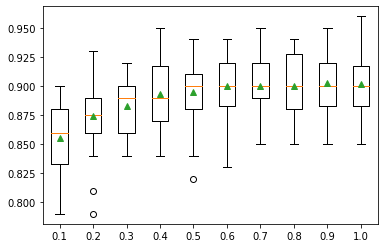

In [8]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Al ejecutar el ejemplo, se reporta la media para cada tamaño de *dataset*. En este caso, los resultados sugieren que al usar un *bootstrap sample* igual al tamaño del *dataset* de entrenamiento, se alcanzan los mejores resultados en este *dataset*. Ese es el caso por defecto y, probablemente, debería ser utilizado en la mayoría de casos.

Con los *boxplot*, se puede apreciar una tendencia que, a mayor tamaño de la muestra, mejores los resultados del modelo.

Se puede probar para ver qué ocurre si se elige un *bootstrap sample* mayor o mucho mayor al tamaño del *traininig dataset* (por ejemplo, colocando un entero como parámetro).

>1.0 0.500 (0.000)
>11.0 0.788 (0.039)
>21.0 0.819 (0.035)
>31.0 0.825 (0.033)
>41.0 0.833 (0.033)
>51.0 0.842 (0.029)
>61.0 0.848 (0.035)
>71.0 0.854 (0.032)
>81.0 0.853 (0.030)
>91.0 0.859 (0.035)


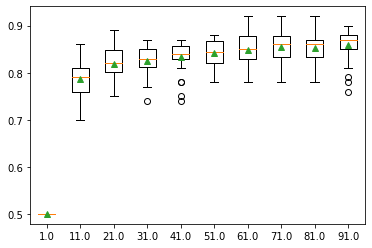

In [12]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 100% to 10000% in 20% increments
	for i in arange(1, 101, 10):
		key = '%.1f' % i
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como se puede apreciar, al usar un tamaño mayor al *dataset* no se experimentó una mejora sustancial en los valores obtenidos en el código original. Creo que esto ocurre debido a que no se está ingresando información nueva, únicamente se están "repitiendo" las observaciones del *dataset* hasta alcanzar la cantidad especificada en el código. 

### Explore Number of Features

El número de *features* que son muestreados aleatoriamente para cada *split* es, tal vez, el **feature más importante para configurar un *random forest***. Es asignado mediante el argumento *max_features* y, por defecto, es la raíz cuadrada de la cantidad de *input features*. En este caso, sería *sqrt(20)* o cerca de 4 features.

En el siguiente ejemplo, se explora el efecto del número de *features* elegidos aleatoriamente en cada *split point*. Se probarán valores de 1 a 7 y se espera un valor pequeño, cercano a 4, para obtener un buen rendimiento basado en la heurística.

>1 0.896 (0.029)
>2 0.903 (0.030)
>3 0.907 (0.026)
>4 0.906 (0.023)
>5 0.904 (0.025)
>6 0.900 (0.025)
>7 0.903 (0.027)


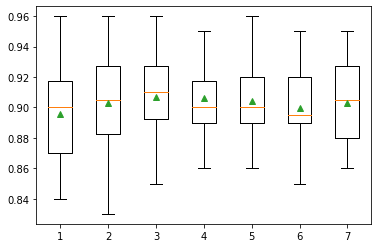

In [13]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, los resultados sugieren que un valor entre 3 y 5 sería apropiado, confirmando el valor por defecto para este *dataset*. Un valor de 5 sería incluso mejor, dada la pequeña desviación estándar en la precisión de la clasificación, comparada con un valor de 3 o 4.

En el *boxplot*, se puede ver una tendencia al alza y alcanzando su cima entre 3 y 5, para luego descender conforme se toman en cuenta tamaños más grandes.

Nuevamente, se realiza la prueba de observar qué pasa al aumentar la cantidad de *features*:

>8 0.899 (0.024)
>9 0.895 (0.025)
>10 0.897 (0.027)
>11 0.893 (0.026)
>12 0.891 (0.025)
>13 0.889 (0.027)
>14 0.895 (0.028)
>15 0.893 (0.028)
>16 0.895 (0.027)
>17 0.889 (0.026)
>18 0.891 (0.025)
>19 0.890 (0.023)
>20 0.884 (0.030)


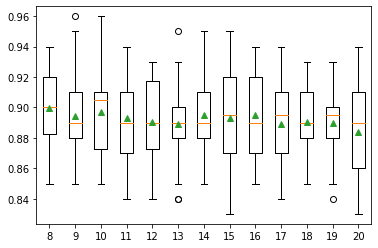

In [14]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(8,21):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como se puede observar, la tendencia continuó a la baja.

### Explore Number of Trees

Típicamente, el número de árboles es incrementado hasta que el rendimiento del modelo se estabiliza. La intuición sugiere que más árboles llevarán al *overfitting*, aunque este no es el caso. Tanto *bagging* como *random forest* son más o menos inmunes al *overfitting* del *training dataset*, dada la naturaleza estocástica del algoritmo de aprendizaje.

El número de árboles puede asignarse mediante el argumento *n_estimators*, que por defecto es 100. El siguiente ejemplo explora el efecto del número de árboles con valores entre 10 y 1000.

>10 0.874 (0.034)
>50 0.893 (0.025)
>100 0.907 (0.024)
>500 0.909 (0.025)
>1000 0.906 (0.027)


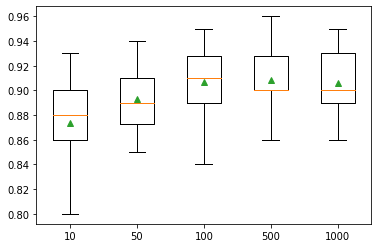

In [15]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, se puede observar que el rendimiento se estabiliza alrededor de los 100 árboles. La media de las precisiones con 100, 500 y 1000 árboles fluctúa, lo que podría ser ruido.

### Explore Tree Depth

Por defecto, los árboles son construidos hasta una profundidad arbitraria y no están podados. Esto es un valor por defecto sensible, pero también se pueden explorar árboles con profundidades distintas.

La profunidad máxima puede ser especificada con el parámetro *max_depth* y está asignada como *None* (*no maximum depth*) por defecto.

El siguiente ejemplo explora el efecto de *random forest maximum depth* en el rendimiento del modelo.

>1 0.771 (0.041)
>2 0.809 (0.039)
>3 0.833 (0.034)
>4 0.860 (0.033)
>5 0.868 (0.025)
>6 0.882 (0.024)
>7 0.887 (0.021)
>None 0.908 (0.024)


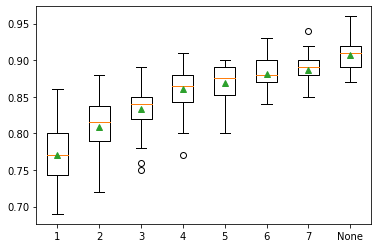

In [16]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, se puede observar que, a mayor profundidad, mejores resultados en el rendimiento del modelo, con el valor por defecto de *no maximum depth* alcanzando los mejores resultados en este *dataset*.

## 4. Common Questions

### What algorithm should be used in the ensemble?

Random forest is designed to be an ensemble of decision tree algorithms.

### How many ensemble members should be used?

The number of trees should be increased until no further improvement in performance is seen on your dataset. As a starting point, we suggest using at least 1000 trees.

### Won´t the ensemble overfit with too many trees?

No. Random forest ensembles are very unlikely to overfit in general.

### How large should the bootstrap sample be?

It is good practice to make the bootstrap sample as large as the original dataset size.

### How many features should be chosen at each split point?

The best practice is to test a suite of differente values and discover what works best for your dataset.

As a heuristic, you can use:

> **Classification:** square root of the number of features.

> **Regression:** one third of the number of features.

### What problems are well suited to random forest?

Random forest is known to work well or even best on a wide range of classification and regression problems.